In [2]:
import requests
from bs4 import BeautifulSoup
from string import punctuation
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import math
import missingno as msno
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import wordnet, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

%matplotlib inline

# web scraping

In [114]:
%run Web_scraping.py

Enter URL with string -?page- in the last :https://www.trustpilot.com/review/www.nikestore.com?page=
Enter number of pages:13
 Web scraping for reviews 

page number 5/ 13 is done.
page number 10/ 13 is done.
creating a dataframe 

created a dataframe 

formatetd the dataframe 



<Figure size 432x288 with 0 Axes>

# load the data

In [115]:
reviews_df = pd.read_csv('web_scraped.csv')

In [116]:
reviews_df.tail()

,Reviewer,Title,Content,Star_rating,Rating,Date,Reviews_posted,Location
231,J.M.W,I recommend Nike.com,I give Nike.com 5 stars because they always sh...,5,Excellent,2017-05-04,7,United States
232,Josh Thompson,Great shoes and joggers!,NaN,4,Great,2017-04-18,43,United States
233,AndreasS,I bought very expensive running shoes …,I bought very expensive running shoes (180€). ...,1,Bad,2017-04-18,7,United States
234,Sam Matharu,Ordered a lot through this site and …,Ordered a lot through this site and always get...,5,Excellent,2017-04-07,3,United Kingdom
235,Pernille Hyttel,Great offers and fast delievery,A large variety of products and lot of great o...,5,Excellent,2011-05-13,29,Denmark


## Data Understanding

In [117]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
Reviewer          236 non-null object
Title             236 non-null object
Content           194 non-null object
Star_rating       236 non-null int64
Rating            236 non-null object
Date              236 non-null object
Reviews_posted    236 non-null int64
Location          236 non-null object
dtypes: int64(2), object(6)
memory usage: 14.8+ KB


In [118]:
reviews_df["Date"]= pd.to_datetime(reviews_df["Date"]) 

In [119]:
reviews_df.describe()

,Star_rating,Reviews_posted
count,236.000000,236.000000
mean,3.322034,6.258475
std,1.749803,13.326862
min,1.000000,1.000000
25%,1.000000,2.000000
50%,4.000000,3.000000
75%,5.000000,6.000000
max,5.000000,145.000000


In [120]:
reviews_df.dtypes

Reviewer                  object
Title                     object
Content                   object
Star_rating                int64
Rating                    object
Date              datetime64[ns]
Reviews_posted             int64
Location                  object
dtype: object

## Data Cleansing

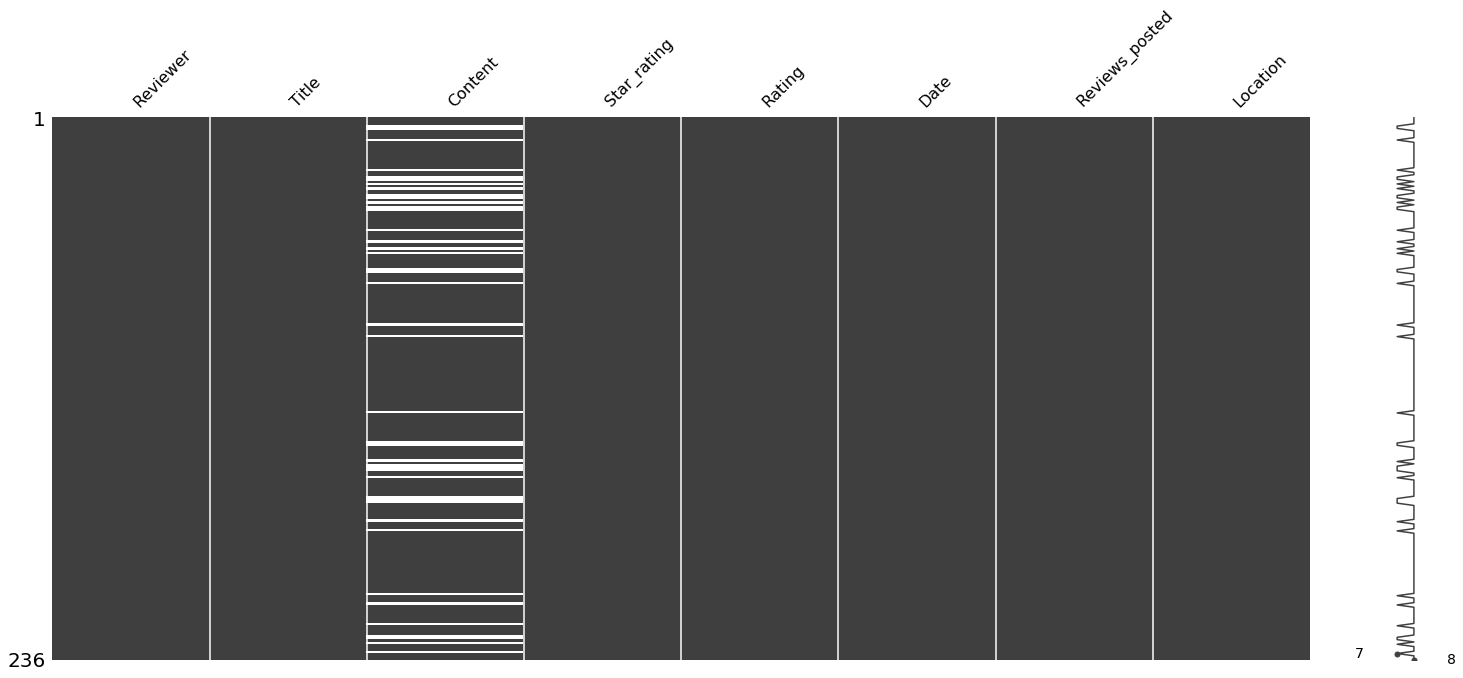

In [121]:
reviews_df.isnull().sum()
msno.matrix(reviews_df);

Review content are empty because the reviweres have only title without content. Those titles are copied to review contents

In [122]:
reviews_df['Location'].unique()

array(['United States', 'United Kingdom', 'Switzerland', 'Germany',
       'Malaysia', 'Philippines', 'Netherlands', 'Croatia', 'Cameroon',
       'France', 'South Africa', 'Hong Kong', 'Poland', 'Denmark',
       'Australia', 'Ireland', 'Sweden', 'Kuwait', 'Canada', 'Norway',
       'Czech Republic', 'Romania', 'Slovenia', 'New Zealand',
       'Bangladesh', 'Mexico', 'Italy', 'U.A.E.', 'India', 'Austria',
       'Ukraine', 'Sri Lanka', 'Slovakia', 'Morocco', 'Portugal',
       'Turkey', 'Serbia', 'Brazil'], dtype=object)

In [123]:
processed_df = reviews_df.copy()

In [124]:
# check null values
processed_df[processed_df.isnull().any(axis=1)]

,Reviewer,Title,Content,Star_rating,Rating,Date,Reviews_posted,Location
4,Charles Nelson,bad service but good product,NaN,1,Bad,2020-12-21,1,United Kingdom
5,Craig Mathews,nice products,NaN,3,Average,2020-12-21,1,United Kingdom
10,Jay Jay,Didn't recieve my order - heard nothing back f...,NaN,1,Bad,2020-12-06,50,United Kingdom
23,Chris Hartman,Nice shoes and very comfortable,NaN,4,Great,2020-11-16,1,United States
26,James Obrien,Nice and comfortable shoes,NaN,3,Average,2020-11-13,1,United States
27,Robert Skinner,Nice shoes and comfortable to wear,NaN,3,Average,2020-11-13,1,United States
29,Roy Hale,I love the products here,NaN,5,Excellent,2020-11-11,2,United States
31,Oliva Jones,Good store and fast shipping,NaN,5,Excellent,2020-11-08,4,United States
34,Lili,I like so much my new nikes,NaN,4,Great,2020-10-29,3,France
35,Brian Jackson,Really good online shopping,NaN,5,Excellent,2020-10-28,6,United States


In [125]:
# fill content colum null values with Title values
processed_df['Content'] = processed_df['Content'].fillna(processed_df['Title'])

In [126]:
# check remaining values
processed_df[processed_df.isnull().any(axis=1)]

,Reviewer,Title,Content,Star_rating,Rating,Date,Reviews_posted,Location


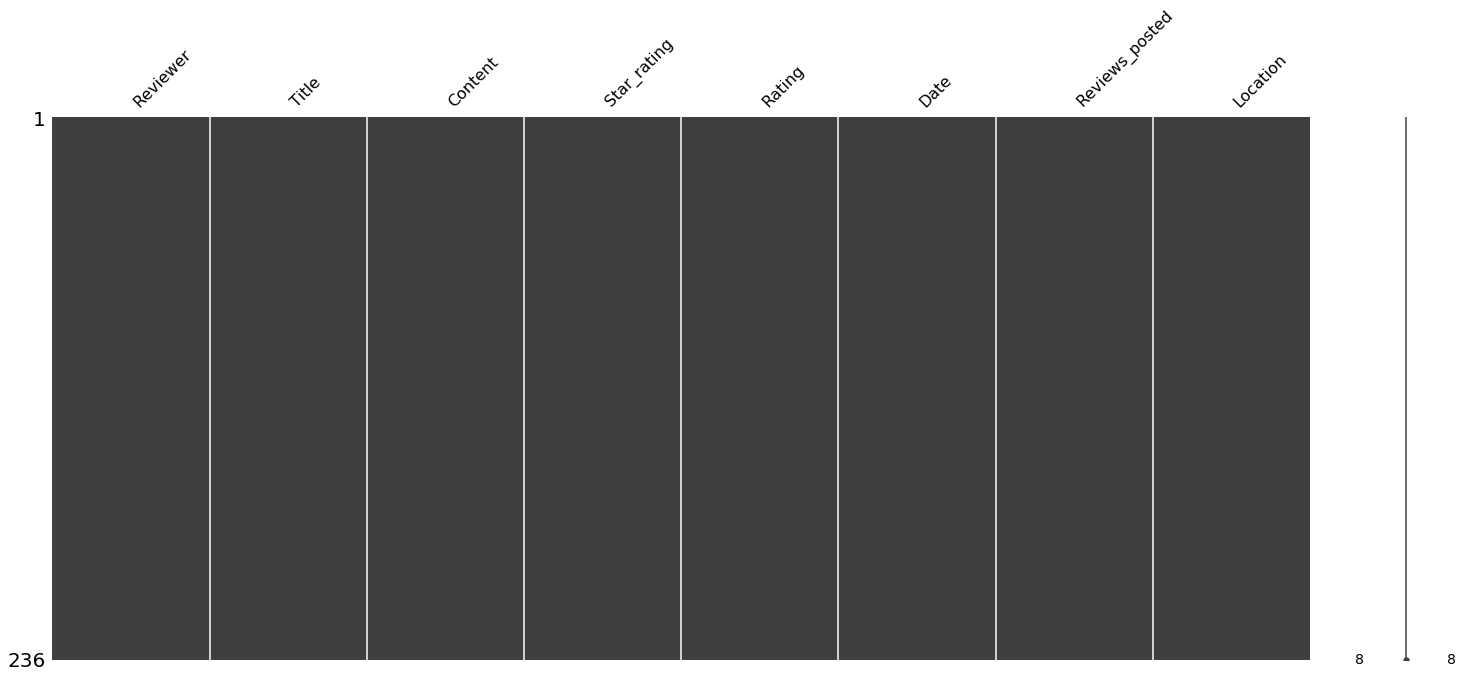

In [127]:
processed_df.isnull().any()
msno.matrix(processed_df);

## Data pre-processing

In [128]:
# lower case
processed_df['cleaned']=processed_df['Content'].apply(lambda x: x.lower())

# Remove digits and words containing digits
processed_df['cleaned']=processed_df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

# Remove Punctuations
processed_df['cleaned']=processed_df['cleaned'].apply(lambda x: re.sub("["+string.punctuation+"]", " ", x))

# Remove numerical 
processed_df['cleaned']=processed_df['cleaned'].apply(lambda x: re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", x))

# special_char_map = {ord('ä'):'ae', ord('ü'):'ue', ord('ö'):'oe', ord('ß'):'ss'}
# processed_df['cleaned']=processed_df['cleaned'].apply(lambda x: x.translate(special_char_map))

# Removing extra spaces
processed_df['cleaned'] = processed_df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

# Stopwords Removal
processed_df['cleaned'] = processed_df['cleaned'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords.words('english')))

# remove words less than 3 letters
processed_df['cleaned'] = processed_df['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>3]))

# lemmitized
processed_df['lemmatized']=processed_df['cleaned'].apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(word, 'v') for word in x.split() ]))

# EDA

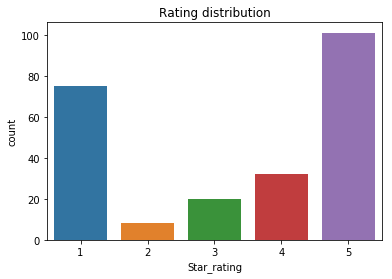

In [129]:
# star rating count
# processed_df.Star_rating.value_counts().plot(kind='bar')
sns.countplot(processed_df.Star_rating);
plt.title('Rating distribution');

Star rating shows most of the positive rating and followed by negative one

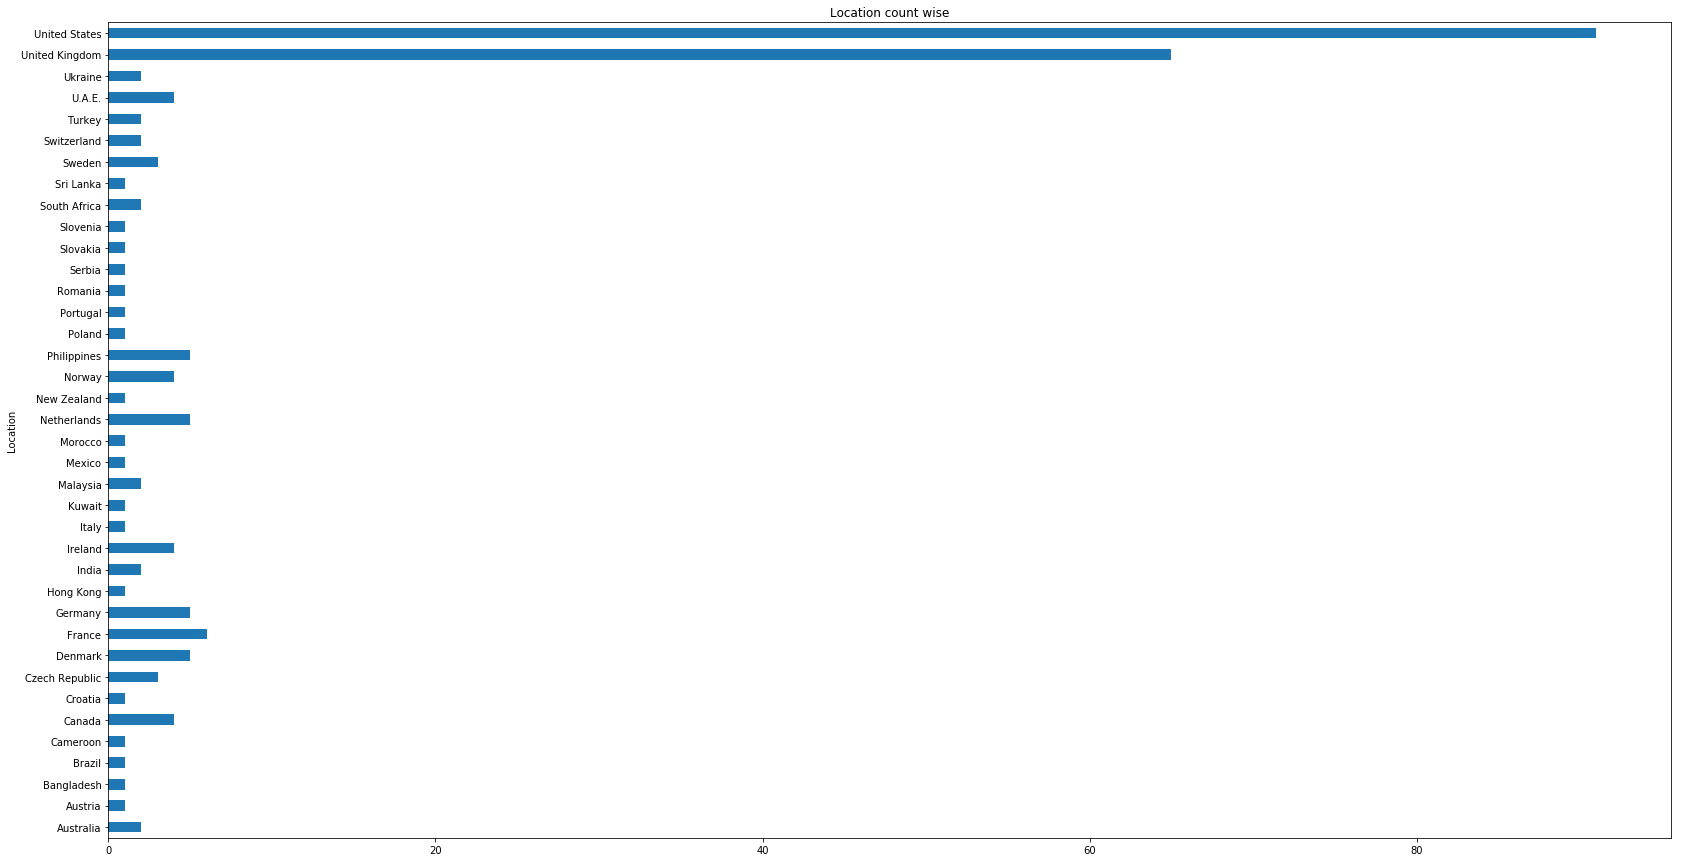

In [146]:
# count by location wise
processed_df.groupby('Location')['Location'].agg('count').sort_index( ascending=True).plot(kind='barh',figsize=(28, 15));
plt.title('Location count wise');

Since US is the established country and has the most of the reviews and followed by UK and European countries

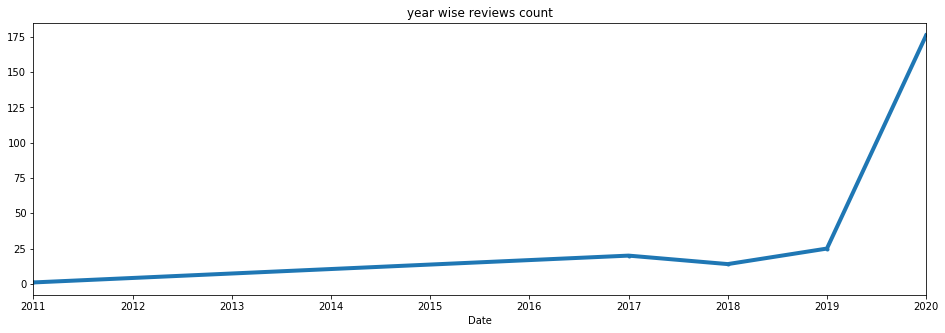

In [148]:
processed_df.groupby(processed_df.Date.dt.year)['Star_rating'].agg('count').plot(kind='line', figsize=(16, 5), lw=4, style='.-');
plt.title('year wise reviews count');

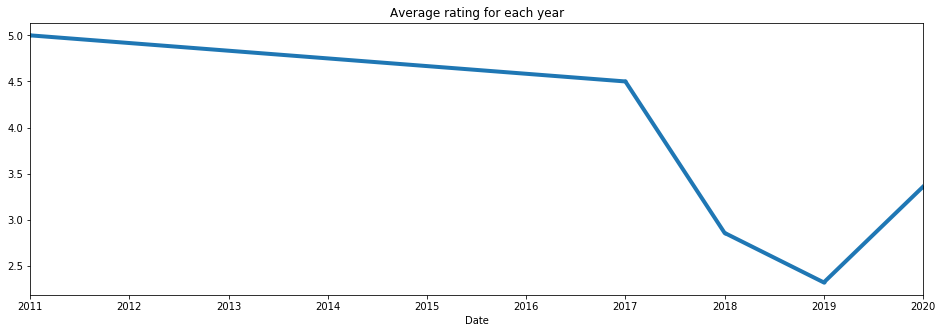

In [149]:
processed_df.groupby(processed_df.Date.dt.year)['Star_rating'].agg('mean').plot(kind='line', figsize=(16, 5), lw=4, style='.-');
plt.title('Average rating for each year');

In 2011-2017,  seems to have negative trend 2018 and 2019 sees a drastic decrease and its increasing currently which seems to be a positive sign

# Natural language processing

In [150]:
tfidf = TfidfVectorizer(max_df=0.90,stop_words='english', ngram_range=(1,3))
tfidf.fit(processed_df['lemmatized'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [151]:
top_20 = list(tfidf.vocabulary_)[:20]
top_20

['easy',
 'website',
 'fast',
 'ship',
 'wonderful',
 'customer',
 'service',
 'great',
 'experience',
 'easy website',
 'website fast',
 'fast ship',
 'ship wonderful',
 'wonderful customer',
 'customer service',
 'service great',
 'great experience',
 'easy website fast',
 'website fast ship',
 'fast ship wonderful']

The words are repeated in the reviews and talks much about their experiences. since positive ratings are higher and tokenize words give clear idea from vocabulary about it. The words such as easy, fast, experience, regarding shipping, website usage, etc...